# Assignment 2b Due: 9/14

Please submit this assignment as Assignment2b_FirstName_LastName

In this assignment you will explore fitting data and assessing how well your fit describes the different data sets.

Assignment Overview:
* Fit data and use $\chi^2$ and the $\chi^2$ test to assess 
* Analyze the efficiency of your data provided differnt threshold levels using your fit results 

For this assingment you can make use of the numpy, matplotlib, and the scipy packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
import scipy.special as sf
import math

# Problem 1: W Boson Mass

Finding the *true* values of a quantity relies on analyzing results for many experiments. One quantity that has been measured many times is the W boson mass see Wikipedia https://en.wikipedia.org/wiki/W_and_Z_bosons and the particle data group (PDG) https://pdg.lbl.gov/2018/listings/rpp2018-list-w-boson.pdf 

**a)** In this problem you will analyze measurements of the W boson from various experiments and determine if the values are consistnet and given this data set, what the best fit value is. Start by reading in the data file Wmass_data.txt, which contains an experiment number, W mass in units of $GeV/c^2$ and its uncertainty.


In [2]:
expNum, W, W_uncertainty = np.loadtxt('data/Wmass_data.txt', unpack=True)

**b)** Compute the error weighted mean of the W mass and its uncertainty. How does the weighted mean compare to the bold faced average of the PDG?

In [3]:
num=0
numSum=0
weight=0
weightSum=0
for boson_meas,error in zip(W,W_uncertainty):
    weight = 1/(error**2)
    num = boson_meas*weight
    numSum = numSum + num
    weightSum = weightSum+ weight
weightedMean = numSum/weightSum
uncertainty = math.sqrt(1/weightSum)
print(weightedMean)
print(uncertainty)

#PDG measurement is equivalent to average in PDG

80.37914612783635
0.010338187803490969


**c)** Calculate the $\chi^2$, degrees of freedom, reduced $\chi^2$, and p-value. The p-value can be calculated using *gammaincc(dof / 2.0, chisq / 2.0)* from *scipy.special*. Based on the p-value are the data consistant?

In [4]:
chisq = np.sum((W-80.379)**2/W_uncertainty**2)
dof = len(W) - 1
reducedChisq = chisq/dof
pValue = sf.gammainc(dof/2.0, chisq/2.0)

print('W Results:\n')
print('chisq = ',chisq, '\ndof = ',dof, '\nreduced chisq = ',reducedChisq,'\np-value = ',pValue)

W Results:

chisq =  8.707036304862834 
dof =  8 
reduced chisq =  1.0883795381078543 
p-value =  0.6323904359219094


Nick: The data are not consistent based on the p-value

**d)** Plot the measurement number vs. the W mass. Don't forget to include the error bars on the W mass measurements. Then Fit a line of the form $y = p_0$, where $p_0$ is a constant parameter.

How does your $p_0$ value compare to the weighted mean you calculated earlier in part b)?

p0 = 80.39080486176063


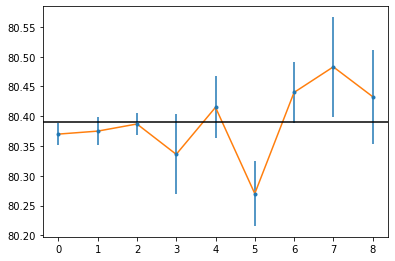

In [5]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.errorbar(expNum, W, yerr = W_uncertainty, fmt='.',label = 'Data')
axes.plot(expNum,W)


def best_fit_intercept(x,y):
    m = (((np.mean(x)*np.mean(y))-np.mean(x*y))/((np.mean(x)*np.mean(y))- np.mean(x*x)))
    b = np.mean(y)-m*np.mean(x)
    return b
p0 = best_fit_intercept(expNum,W)
plt.axhline(y =p0 ,color='k')
print('p0 =', p0)

p0 is somewhat close to the mean calculated in part b, a 0.0146% difference, though this difference is significant when calculating a value like this.

# Problem 2: Proton Charge Radius

We will carry an identical analysis as we did in Problem 1, but on a different quantity, the proton charge radius. The proton charge radius has been a recent hot topic in the nuclear physics field, as new designed experiments using muonic hydorgen have made very percise measurements of it. See https://www.nature.com/articles/s41586-019-1721-2

**a)** Import the data set proton_radius_data.txt, which includes the experiment number, the proton charge radius, and its uncertainty measured in $fm$. 

In [6]:
expNumPro, proCharge, pc_uncertainty = np.loadtxt('data/proton_radius_data.txt', unpack=True)

**b)** Compute the error weighted mean of the proton charge radius and its uncertainty. 

You can also compare this to the PDG value (pgs. 6 and 7): https://pdg.lbl.gov/2018/listings/rpp2018-list-p.pdf 

In [18]:
num=0
numSum=0
weight=0
weightSum=0
for pro_meas,error in zip(proCharge,pc_uncertainty):
    weight = 1/(error**2)
    num = pro_meas*weight
    numSum = numSum + num
    weightSum = weightSum+ weight
weightedMean = numSum/weightSum
uncertainty = math.sqrt(1/weightSum)
print(weightedMean)
print(uncertainty)


0.8416225242550589
0.0003337320304863616


**c)** Calculate the  $\chi^2$, degrees of freedom, reduced $\chi^2$ and p-value. Based on the p-value are the data consistant? Do you see what all of the fuss is about.

In [22]:
chisq = np.sum((proCharge-.8751)**2/pc_uncertainty**2)
dof = len(proCharge) - 1
reducedChisq = chisq/dof
pValue = sf.gammainc(dof/2.0, chisq/2.0)

print('Proton Results:\n')
print('chisq = ',chisq, '\ndof = ',dof, '\nreduced chisq = ',reducedChisq,'\np-value = ',pValue)

Proton Results:

chisq =  10285.48511513286 
dof =  14 
reduced chisq =  734.6775082237757 
p-value =  1.0


**d)** Plot the measurement number vs. the proton charge radius. Don't forget to include the error bars on the proton charge radius measurements. Then Fit a line of the form  $y = p_0$ , where $p_0$ is a constant parameter.

How does your $p_0$ value compare to the weighted mean you calculated earlier in part b)?

p0 = 0.8771218811321834


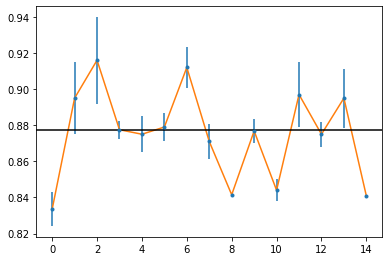

In [23]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.errorbar(expNumPro, proCharge, yerr = pc_uncertainty, fmt='.',label = 'Data')
axes.plot(expNumPro,proCharge)


def best_fit_intercept(x,y):
    m = (((np.mean(x)*np.mean(y))-np.mean(x*y))/((np.mean(x)*np.mean(y))- np.mean(x*x)))
    b = np.mean(y)-m*np.mean(x)
    return b
p0 = best_fit_intercept(expNumPro,proCharge)
plt.axhline(y =p0 ,color='k')
print('p0 =', p0)

#p0 value is 4.13% different than weighted mean value, a significant difference.

# Problem 3: Selecting Data

In particle physics we sometimes want to measure a particlular particle that is created from the many resulting from a collision in a particle collider. In recording these collision events we typically measure other particles which are not the ones we are intersted in. The events we are interested in we reffer to as our signal, whereas the ones we are not interested in we reffer to as a background. 

**a)** The provided data set (Ep_data.txt) contains values of particle energy/momentum (E/p), the number of particles, and the uncertainty on the number of particles. Import the data and plot the number of particles vs. E/p and be sure to include the error bars on the particle counts. 

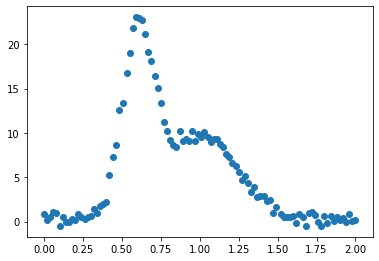

In [10]:
partEnergyMomentum, numParticles, numPart_uncertainty = np.loadtxt('data/Ep_data.txt', unpack=True)
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
plt.scatter(partEnergyMomentum,numParticles)

**b)** You should notice that there appear to be two clear distributions here. One which seems to be centered E/p = 0.6 and another around E/p = 1. The population at the lower E/p represent pions, whereas the population around E/p = 1 are electrons. For this exersice we will treat the pions as a background and the electrons as our signal. We will model each particle type to have a Gaussian distribution. Define two functions, one that returns a value computed from a Gaussian value, and anther function that returns a value computed from the sum of two Gaussian functions. Then make a fit to the data using the sum of two Gaussian functions. Each of your Gaussian functions can take the form of:

$G_1(x) = p_1 e^{-(x-p_2)^2/(2p_3)}$

where the $p_1, p_2,$ and $p_3$ are three parameters for the one Gaussian function. You will have 3 more different parameters for the other Gaussian function $G_2(x)$. 

Note: Did you get a negative value for the gaussian widths from your fit? We know that a negative value is not physical. Try to give some initial parameters for the fit to start with.

Initial fit:
[16.05301359  0.73255887  0.07499512]
[[ 1.55424714e-02 -1.87170303e-06 -9.65939088e-05]
 [-1.87170303e-06  6.09227071e-06 -2.30184082e-08]
 [-9.65939088e-05 -2.30184082e-08  1.81604568e-06]]
Initial fit:
[2.02093825e+01 6.01230419e-01 1.05958790e-02 9.74415738e+00
 1.00366163e+00 5.93336943e-02]
[[ 1.34645725e-01  2.68239095e-04  5.83610063e-05  6.72854203e-03
   2.44106129e-03 -1.14429616e-03]
 [ 2.68239095e-04  2.44561443e-06  2.80427723e-07 -3.19598388e-05
   8.14672579e-06 -2.91395427e-06]
 [ 5.83610063e-05  2.80427723e-07  1.49034949e-07 -4.71426501e-06
   2.46364865e-06 -9.85868627e-07]
 [ 6.72854203e-03 -3.19598388e-05 -4.71426501e-06  1.89696047e-02
   5.70633395e-06 -1.70261271e-04]
 [ 2.44106129e-03  8.14672579e-06  2.46364865e-06  5.70633395e-06
   7.59636678e-05 -2.62944314e-05]
 [-1.14429616e-03 -2.91395427e-06 -9.85868627e-07 -1.70261271e-04
  -2.62944314e-05  1.51634226e-05]]


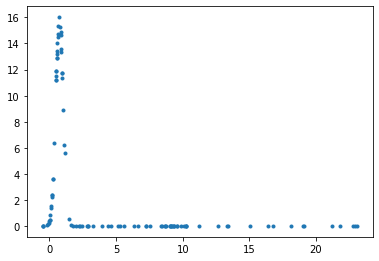

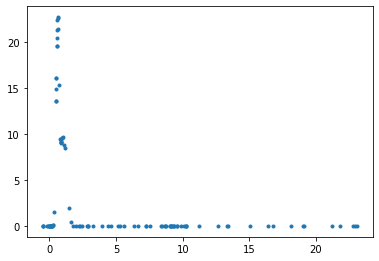

In [11]:
def gauss_func1(x,p1,p2,p3):
    return p1*np.exp(-(x-p2)**2/(2*p3))

def gauss_funcSum(x,p1,p2,p3,p4,p5,p6):
    return p1*np.exp(-(x-p2)**2/(2*p3))+p4*np.exp(-(x-p5)**2/(2*p6))

print('Initial fit:')
popt,pcov = curve_fit(gauss_func1,partEnergyMomentum,numParticles,sigma=numPart_uncertainty,absolute_sigma=True)
print(popt)
print(pcov)

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(numParticles,gauss_func1(numParticles,*popt),'.')

print('Initial fit:')
popt,pcov = curve_fit(gauss_funcSum,partEnergyMomentum,numParticles,sigma=numPart_uncertainty,absolute_sigma=True)
print(popt)
print(pcov)
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(numParticles,gauss_funcSum(numParticles,*popt),'.')


**c)** Calculate your $\chi^2$, degrees of freedom, reduced $\chi^2$, and p-value for the fit to the data.
Based on those statistics above is this a good fit? Explain.

In [12]:
Fit1_chisq = np.sum((numParticles-gauss_funcSum(partEnergyMomentum,*popt))**2/numPart_uncertainty**2)
dof = len(numParticles) - len(popt) - 1

Fit1_pvalue = sf.gammaincc(dof/2.0, Fit1_chisq/2.0)

print('Fit 1 results: \n')
print('chi2 = ',Fit1_chisq, '\n dof = ', dof, '\n reduced chi2 = ', Fit1_chisq/dof, '\n p-value = ', Fit1_pvalue)

Fit 1 results: 

chi2 =  108.42094110108559 
 dof =  93 
 reduced chi2 =  1.1658165709794148 
 p-value =  0.13094980575416304


**d)** On the same graph, plot your data, the total fit to it, and the single Gaussian functions computed using the parameter results from your 2 Gaussian function fit.

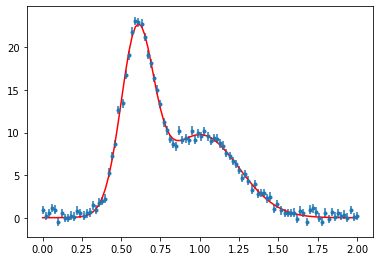

In [13]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.errorbar(partEnergyMomentum,numParticles,numPart_uncertainty, fmt='.', label = 'Data')
axes.plot(partEnergyMomentum,gauss_funcSum(partEnergyMomentum,*popt),'r-', label = 'fit 2')

**e)** We can use the $E/p$ distribution to try to select the maximum number of electron while minimizing the pions that *leak* into our electron signal. We can do this by requireing our selected sample to be larger than some $E/p$ threshold value. Any data that has an $E/p$ value lower then the threshold we throw it out. In a physics analysis this is called a cut. However we need to be careful, if we place a cut at $E/p$ that is too large we will have a really clean electron sample, but throw away a lot of good electrons. On the other hand if we make the $E/p$ cut too low we will keep most of our electrons, but let in a lot of background (pions). So we must compormise between clean data and statistics. To do this lets calculat the total number of electrons we have from $0.0 < E/p < 2$. This can be obtained by integrating (you can use scipy integrators, I used *integrate.quad* when doing this exersise)the electron contribution from our fit. We will call this number e_tot. Do a similar thing for the total pions and call that number pi_tot. 

For 10 equally spaced E/p thresholds between 0.3 and 0.8, calculate the number of electrons that are above each of the thresholds, we can call this array e_sig and can be obtained by integrating from the E/p threshold to the E/p = 2. Do a similar thing for the pion distribution. 



In [14]:
from scipy import integrate
f = lambda x: p1*np.exp(-(x-p2)**2/(2*p3))
epThres = np.linspace(0.3,0.8,10)
p1,p2,p3 = popt[3:]
a = 0
b = 2
e_tot = integrate.quad(f,a,b)[0]
e_sig = []
for thres in epThres:
    e_sig.append(integrate.quad(f,thres,b)[0])

p1,p2,p3 = popt[:3]
p_tot = integrate.quad(f,a,b)[0]

p_sig = []
for thres in epThres:
    p_sig.append(integrate.quad(f,thres,b)[0])

print(e_tot)
print(p_tot)

print(e_sig)
print(p_sig)



5.949320279941932
5.2144855798295255
[5.9379278357655405, 5.926235723932094, 5.904841059038679, 5.86766845175477, 5.806342282071617, 5.710275290938111, 5.567383166477523, 5.365570531103252, 5.094928936173866, 4.750303750634601]
[5.2055444539930065, 5.1701578200727045, 5.045659347813582, 4.716171476153396, 4.060108635455755, 3.0771373899470933, 1.968828190168261, 1.028419908907845, 0.4279478607259692, 0.1394445155557596]


**f)** Plot the ratios e_sig/e_tot and pi_sig/pi_tot as a function of E/p threshold on the same graph. 

[0.9980850847424031, 0.9961197994184869, 0.9925236465998958, 0.9862754357901271, 0.9759673389324216, 0.9598197814614623, 0.935801554548659, 0.9018795893697662, 0.8563884101771025, 0.7984615934445819]
[0.9982853292621798, 0.9914991116423281, 0.9676236074620687, 0.9044365746059997, 0.7786211263409976, 0.5901133185313541, 0.3775690161622092, 0.19722365574965625, 0.08206904673038905, 0.02674175878348452]


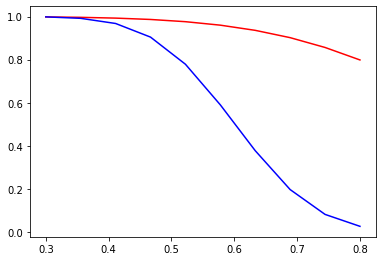

In [15]:
e_ratio = []
for values in e_sig:
    e_ratio.append(values/e_tot)
    
p_ratio = []
for values in p_sig:
    p_ratio.append(values/p_tot)

print(e_ratio)
print(p_ratio)
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(epThres,e_ratio,'r-',label = 'e_sig/e_tot')
axes.plot(epThres,p_ratio,'b-',label = 'p_sig/p_tot')

**g)** When the e_sig/etot ratio is 90%, how what percentage of the pion distribution is contaminating our electron sample?

~20% contamination